In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go

df=pd.read_csv('spotify_with_release_dates.csv')

In [3]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['duration_min'] = df['duration_ms']/60000
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
popularity,540.0,73.333333,17.0,67.0,76.0,84.0,100.0,16.41394
acousticness,540.0,0.369578,0.00001,0.04635,0.261,0.66425,0.996,0.341149
danceability,540.0,0.583677,0.0843,0.46175,0.5995,0.72925,0.942,0.189607
duration_ms,540.0,222614.646296,45911.0,181819.75,212500.0,249220.0,853827.0,75597.772759
energy,540.0,0.548731,0.00144,0.385,0.568,0.754,0.983,0.258626
instrumentalness,540.0,0.101744,0.0,0.0,0.000002,0.00125,0.975,0.272328
liveness,540.0,0.184869,0.0323,0.0936,0.125,0.231,0.978,0.153264
loudness,540.0,-9.34928,-39.869,-10.726,-7.293,-5.2645,-1.339,6.699199
speechiness,540.0,0.091421,0.0237,0.03585,0.0475,0.0905,0.947,0.119882
tempo,540.0,116.832974,45.957,92.831,113.549,136.041,206.247,30.830252


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genre             540 non-null    object        
 1   artist_name       540 non-null    object        
 2   track_name        540 non-null    object        
 3   track_id          540 non-null    object        
 4   popularity        540 non-null    int64         
 5   acousticness      540 non-null    float64       
 6   danceability      540 non-null    float64       
 7   duration_ms       540 non-null    int64         
 8   energy            540 non-null    float64       
 9   instrumentalness  540 non-null    float64       
 10  key               540 non-null    object        
 11  liveness          540 non-null    float64       
 12  loudness          540 non-null    float64       
 13  mode              540 non-null    object        
 14  speechiness       540 non-

In [5]:
top_10_tracks = df.groupby('genre').head(10)
top_tracks=top_10_tracks.loc[
    top_10_tracks.groupby('genre')['popularity'].idxmax()
][['genre', 'track_name', 'artist_name', 'popularity']]
top_tracks['label'] = top_tracks['track_name'] + ' – ' + top_tracks['artist_name']
top_10_tracks.dropna()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,release_date,release_year,duration_min
0,A Capella,MC6 A Cappella,For the Longest Time,0PuWvFJqZPJAxZNrFgw8xL,44,0.7800,0.616,223813,0.298,0.000000,...,0.0973,-7.712,Major,0.0274,82.471,4/4,0.712,2011-01-01,2011.0,3.730217
1,A Capella,The Singers Unlimited,Clair,1iXJKuzDH0E6PnTk2lQXAq,33,0.9730,0.484,154200,0.222,0.000306,...,0.1040,-14.631,Minor,0.0440,127.689,4/4,0.409,2014-01-31,2014.0,2.570000
2,A Capella,MC6 A Cappella,The Lion Sleeps Tonight,0crWDkAajRTnsGuZ6CAU85,26,0.3020,0.691,183920,0.490,0.000006,...,0.2290,-11.222,Major,0.0743,107.066,4/4,0.664,2011-01-01,2011.0,3.065333
3,A Capella,MC6 A Cappella,Come Go With Me,3XxwdU13609bTGaAFRg3PA,25,0.8020,0.717,137800,0.518,0.000000,...,0.0940,-7.754,Major,0.0883,129.878,4/4,0.672,2011-01-01,2011.0,2.296667
4,A Capella,Glad,A Debtor to Mercy Alone,6TK4I15u1oym5H2eETng4F,24,0.5990,0.389,181267,0.153,0.000000,...,0.0902,-12.023,Major,0.0430,120.626,4/4,0.236,2005-01-01,2005.0,3.021117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,World,Manu Chao,Me Gustas Tu,6b37xrsNCWYIUphFBazqD6,71,0.6630,0.657,239987,0.741,0.494000,...,0.2220,-6.822,Minor,0.0825,175.949,4/4,0.908,2001-06-01,2001.0,3.999783
525,World,Hillsong UNITED,Oceans (Where Feet May Fail),5Mw9bXG1dLNhbjofkVS2oR,70,0.5080,0.262,536000,0.361,0.002680,...,0.1080,-10.191,Major,0.0333,126.860,4/4,0.056,2013-02-23,2013.0,8.933333
526,World,Mosaic MSC,Tremble - Live,35GACeX8Zl55jp29xFbvvo,70,0.2210,0.329,309093,0.682,0.000000,...,0.1900,-6.374,Major,0.0526,148.029,4/4,0.162,2016-09-16,2016.0,5.151550
527,World,Elevation Worship,Do It Again,3iOpiHDobxZO7S4p9Y2Fgu,70,0.0119,0.347,398333,0.508,0.000000,...,0.5950,-7.555,Major,0.0297,171.827,4/4,0.159,2017-03-17,2017.0,6.638883


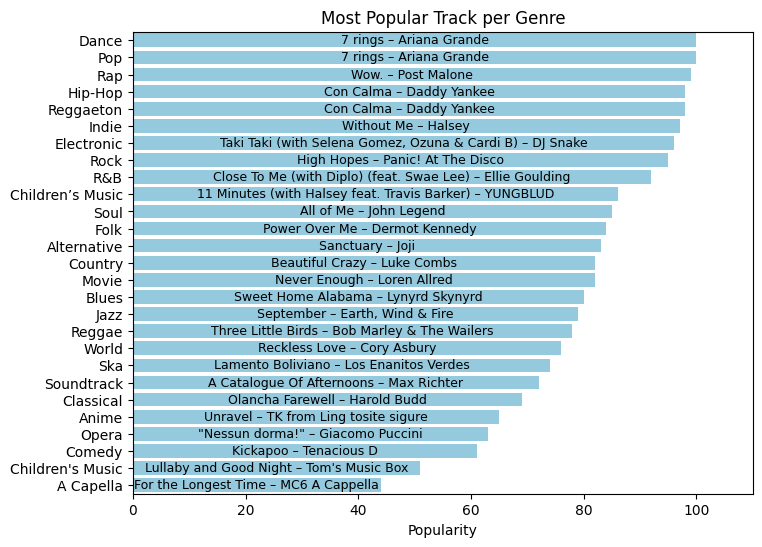

In [6]:
top_tracks=top_tracks.sort_values(['popularity'], ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=top_tracks,
    y='genre',
    x='popularity',
    color='skyblue'
)
y_tick_labels = [label.get_text() for label in ax.get_yticklabels()]
y_tick_positions = ax.get_yticks()
genre_to_y_pos = dict(zip(y_tick_labels, y_tick_positions))
for index, row in top_tracks.iterrows():
    genre = row['genre']
    popularity = row['popularity']
    track_artist = f"{row['track_name']} – {row['artist_name']}"
    y_pos = genre_to_y_pos.get(genre)
    if y_pos is not None:
        text_x_position = popularity / 2
        plt.text(text_x_position,
                 y_pos,
                 track_artist,
                 va='center',
                 ha='center',
                 color='black',
                 fontsize=9)
ax.set_xlim(0, top_tracks['popularity'].max() * 1.1)
plt.title('Most Popular Track per Genre')
plt.ylabel('')
plt.xlabel('Popularity')
plt.show()


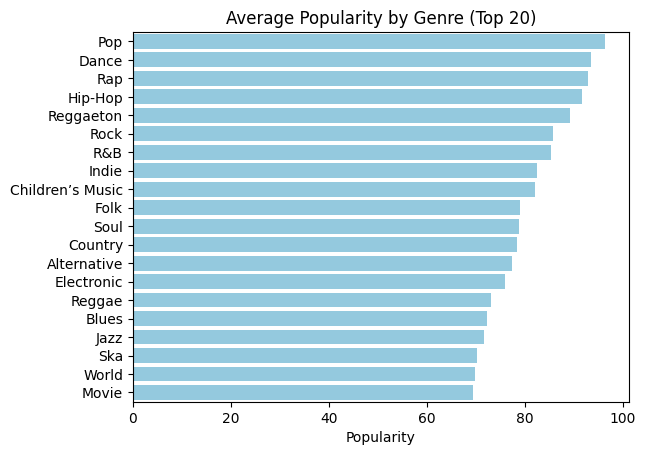

In [7]:
genre_avg = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(20)

plt.figure()
sns.barplot(x=genre_avg.values, y=genre_avg.index, color='skyblue')
plt.title('Average Popularity by Genre (Top 20)')
plt.xlabel('Popularity')
plt.ylabel('')
plt.show()

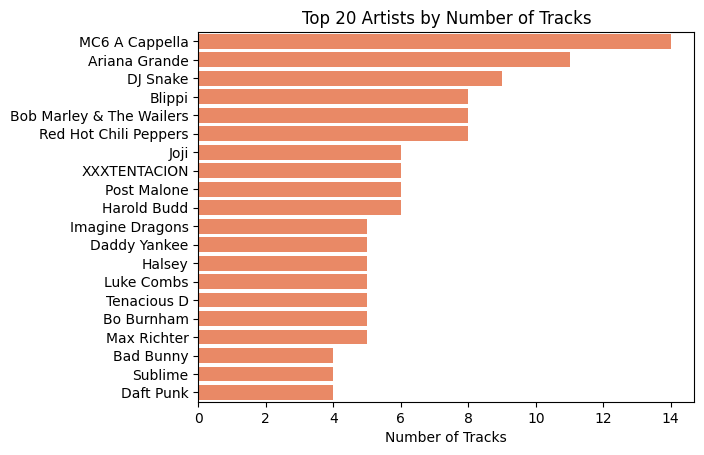

In [8]:
top_artists = df['artist_name'].value_counts().head(20)

plt.figure()
sns.barplot(x=top_artists.values, y=top_artists.index, color='coral')
plt.title('Top 20 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('')
plt.show()

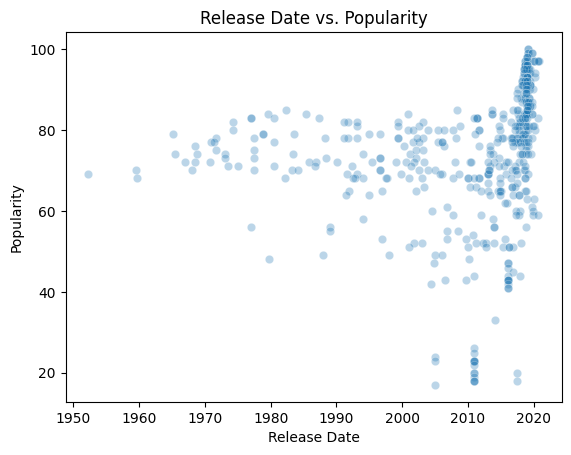

In [9]:
plt.figure()
sns.scatterplot(data=df, x='release_date', y='popularity', alpha=0.3)
plt.title('Release Date vs. Popularity')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.show()


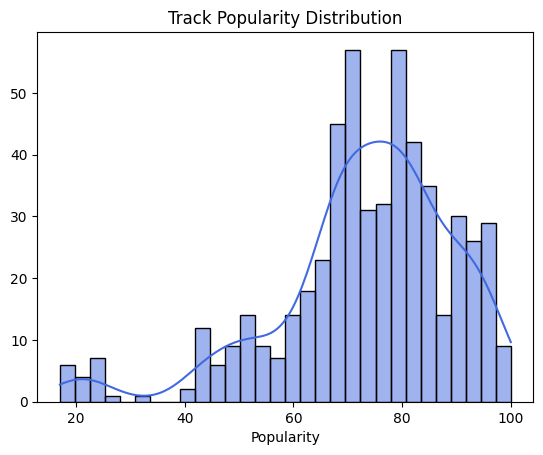

In [10]:
plt.figure()
sns.histplot(df['popularity'], bins=30, kde=True, color='royalblue')
plt.title('Track Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('')
plt.show()

In [ ]:
genres = df['genre'].unique().tolist()
dropdown = widgets.Dropdown(options=genres, description='Genre:')

def top_artists_by_avg_popularity(genre):
    filtered = df[df['genre'] == genre]
    avg_popularity = (
        filtered.groupby('artist_name')['popularity']
        .mean()
        .sort_values(ascending=False)
        .head(20)
    )
    artists = avg_popularity.index[::-1]
    popularity = avg_popularity.values[::-1]
    fig = go.Figure(go.Bar(
        x=popularity,
        y=artists,
        orientation='h',
        marker=dict(color='seagreen')
    ))
    fig.update_layout(
        title=f'Top Artists in {genre} by Average Popularity',
        xaxis_title='Average Popularity',
        yaxis_title='Artist',
        yaxis=dict(tickmode='linear'),
        template='plotly_white'
    )
    fig.show()

widgets.interact(top_artists_by_avg_popularity, genre=dropdown);


interactive(children=(Dropdown(description='Genre:', options=('A Capella', 'Alternative', 'Anime', 'Blues', "C…

In [12]:
df['hover_title'] = df['track_name'] + ' - ' + df['artist_name']

fig = px.scatter(
    df,
    x='energy',
    y='danceability',
    color='popularity',
    hover_name='hover_title',
    title='Interactive Energy vs. Danceability'
)

fig.show()

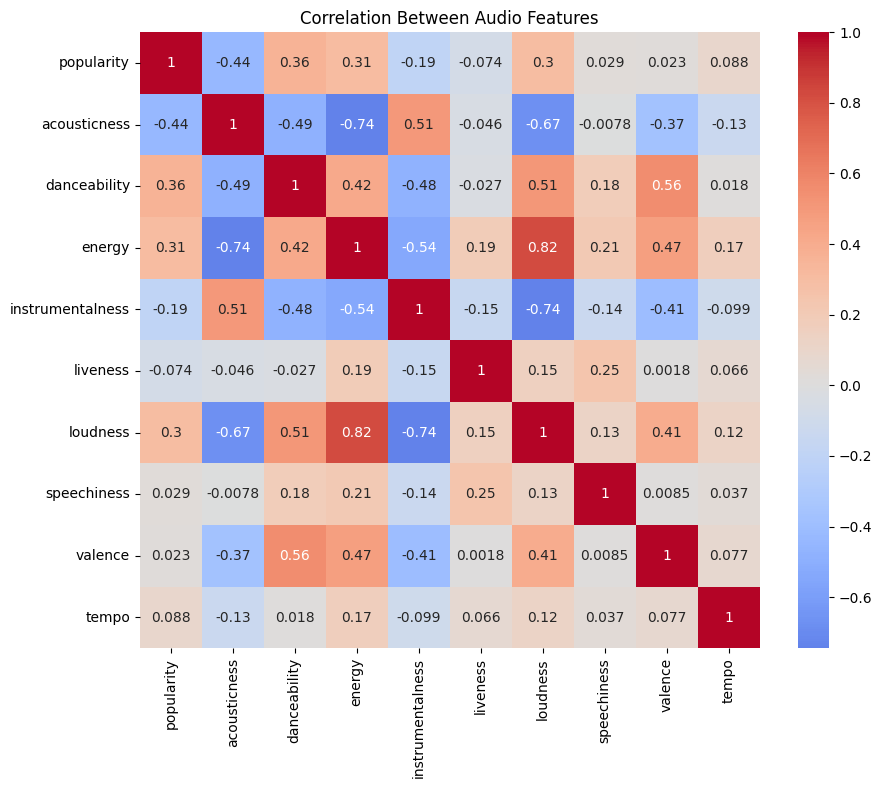

In [13]:
numerical_cols = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
corr = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Audio Features')
plt.show()

